# Brain Stroke Dataset

This is midterm project for the ML Zoomcamp 2023.

Dataset: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

In [120]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd 
import seaborn as sns 

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import unidecode

import warnings
warnings.filterwarnings('ignore')

from tqdm.auto import tqdm

In [121]:
df = pd.read_csv('data/brain_stroke.csv')

In [122]:
df.head().T

,0,1,2,3,4
gender,Male,Male,Female,Female,Male
age,67.0,80.0,49.0,79.0,81.0
hypertension,0,0,0,1,0
heart_disease,1,1,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Private,Private,Self-employed,Private
Residence_type,Urban,Rural,Urban,Rural,Urban
avg_glucose_level,228.69,105.92,171.23,174.12,186.21
bmi,36.6,32.5,34.4,24.0,29.0
smoking_status,formerly smoked,never smoked,smokes,never smoked,formerly smoked


In [123]:
df.shape

(4981, 11)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [125]:
df.duplicated().sum()

0

In [126]:
df = df.drop_duplicates()
df.shape

(4981, 11)

In [127]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Initial data preparation

In [128]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [129]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [130]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [131]:
df.head().T

,0,1,2,3,4
gender,male,male,female,female,male
age,67.0,80.0,49.0,79.0,81.0
hypertension,0,0,0,1,0
heart_disease,1,1,0,0,0
ever_married,yes,yes,yes,yes,yes
work_type,private,private,private,self-employed,private
residence_type,urban,rural,urban,rural,urban
avg_glucose_level,228.69,105.92,171.23,174.12,186.21
bmi,36.6,32.5,34.4,24.0,29.0
smoking_status,formerly_smoked,never_smoked,smokes,never_smoked,formerly_smoked


In [132]:
df.stroke.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

## Setting up the validation framework: Train test split

In [14]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [16]:
len(df_train), len(df_val), len(df_test)

(2988, 996, 997)

In [17]:
df_train.head().T

,818,861,4318,2431,752
gender,female,female,female,male,female
age,59.0,47.0,34.0,80.0,36.0
hypertension,0,0,0,1,1
heart_disease,0,0,0,0,0
ever_married,yes,yes,no,yes,yes
work_type,self-employed,private,govt_job,self-employed,private
residence_type,urban,rural,urban,urban,urban
avg_glucose_level,81.64,204.63,226.28,213.33,91.56
bmi,32.8,43.4,38.4,31.1,42.2
smoking_status,unknown,never_smoked,unknown,formerly_smoked,never_smoked


In [136]:
df_train.smoking_status.value_counts()

never_smoked       1075
unknown             933
formerly_smoked     513
smokes              467
Name: smoking_status, dtype: int64

In [18]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [19]:
y_train = df_train.stroke.values
y_test = df_test.stroke.values
y_val = df_val.stroke.values

In [20]:
del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

## Exploratory data analysis
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [21]:
df_train_full = df_train_full.reset_index(drop=True)

In [22]:
df_train_full.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
df_train_full.stroke.value_counts()

0    3798
1     186
Name: stroke, dtype: int64

In [24]:
df_train_full.stroke.value_counts(normalize=True)

0    0.953313
1    0.046687
Name: stroke, dtype: float64

In [25]:
global_stroke_rate = df_train_full.stroke.mean()
round(global_stroke_rate, 2)

0.05

In [26]:
df_train_full.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [27]:
columns_categorical = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
columns_categorical

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [28]:
columns_numerical = ['age', 'avg_glucose_level', 'bmi']

In [29]:
columns_binary = ['hypertension', 'heart_disease']

In [30]:
for idx in columns_categorical:
    df[idx] = (df[idx].apply(lambda x: unidecode.unidecode(x))
               .str.lower()
               .str.replace(" ", "_"))

In [31]:
df[columns_categorical + columns_binary].nunique()

gender            2
ever_married      2
work_type         4
residence_type    2
smoking_status    4
hypertension      2
heart_disease     2
dtype: int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [33]:
# df.isnull().sum()

In [34]:
df['ever_married'] = [ 1 if status =='Yes' else 0 
                      for status in df['ever_married'] ]

In [35]:
df['gender'] = [1 if gender == 'Female' else 0 
                for gender in df['gender']]

In [36]:
# df.isnull().sum()

In [37]:
# df.isnull().any()

In [38]:
# for i in df.columns:
#     print(df[i].unique())

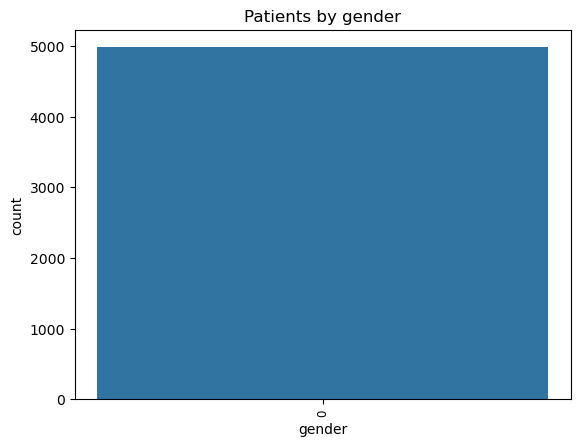

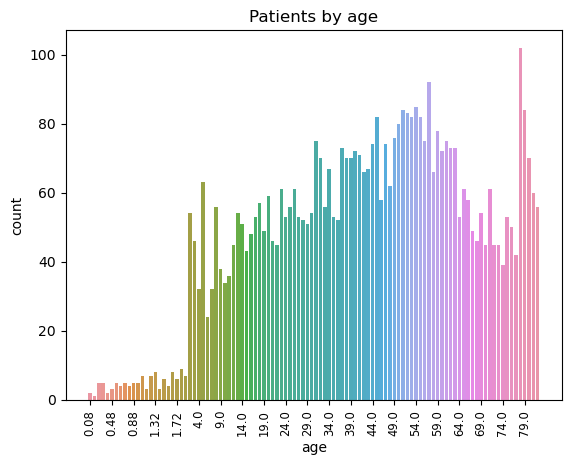

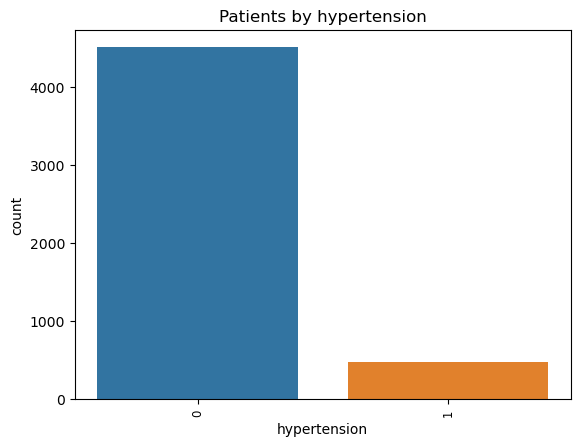

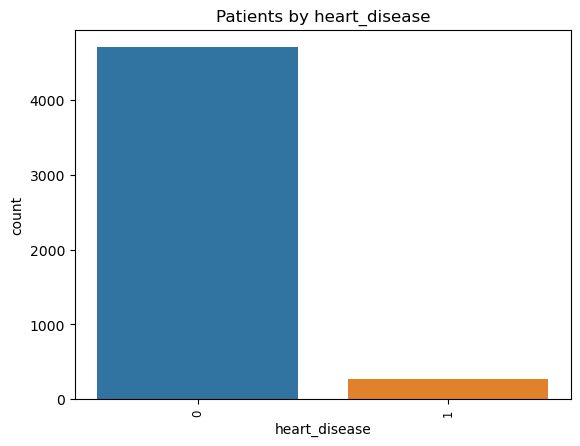

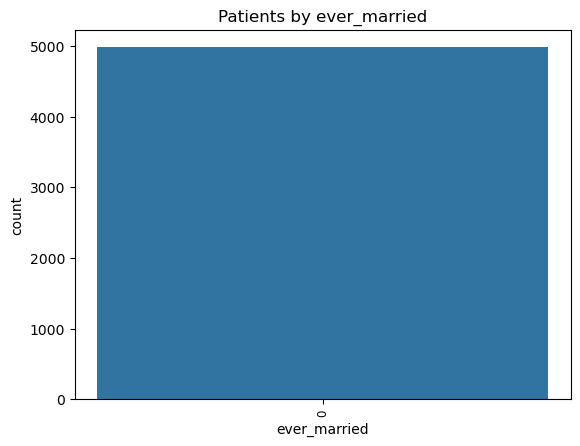

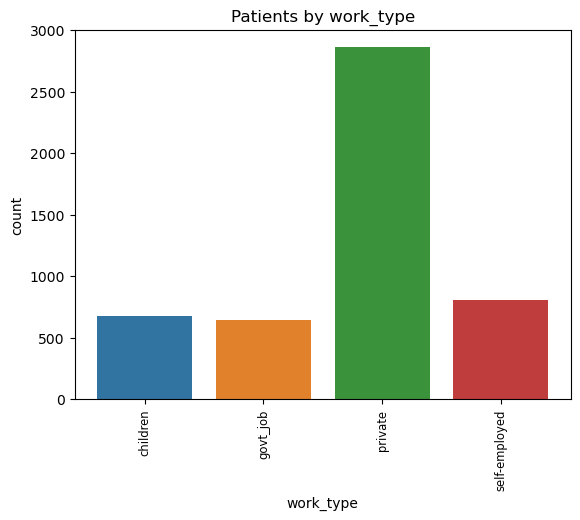

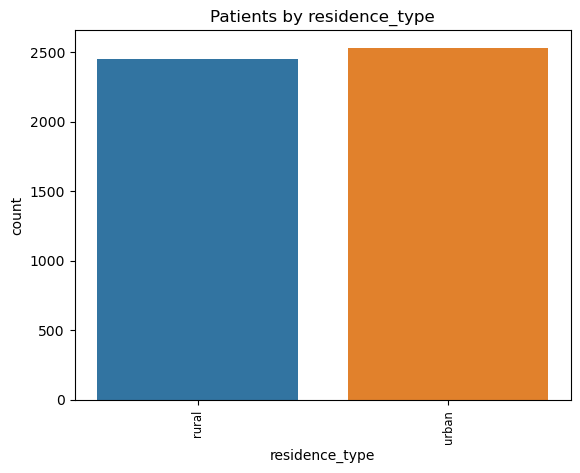

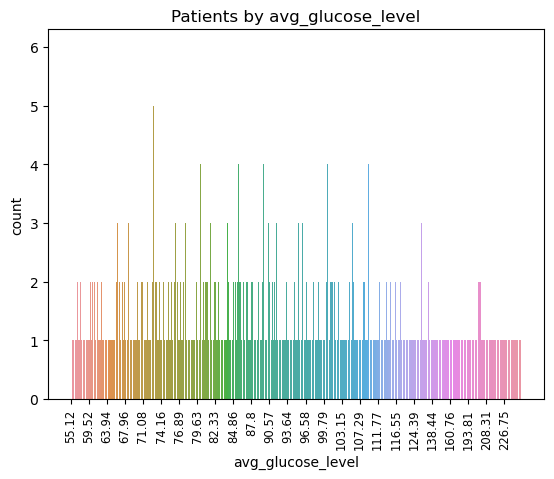

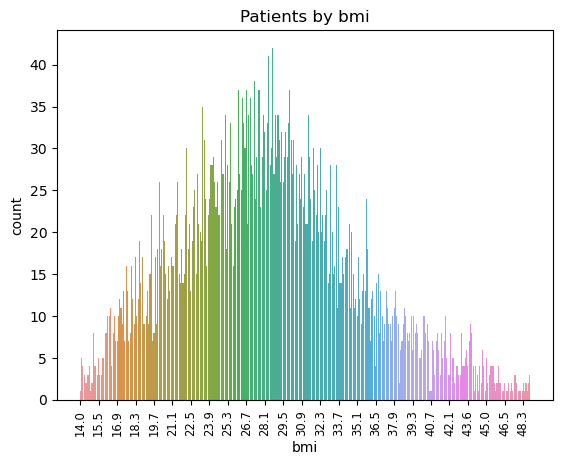

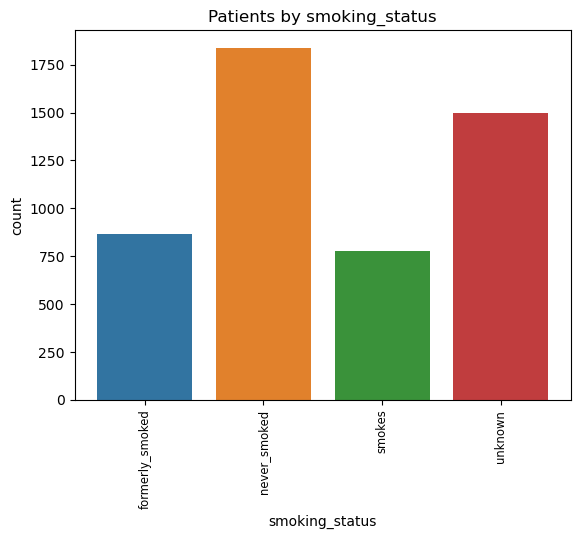

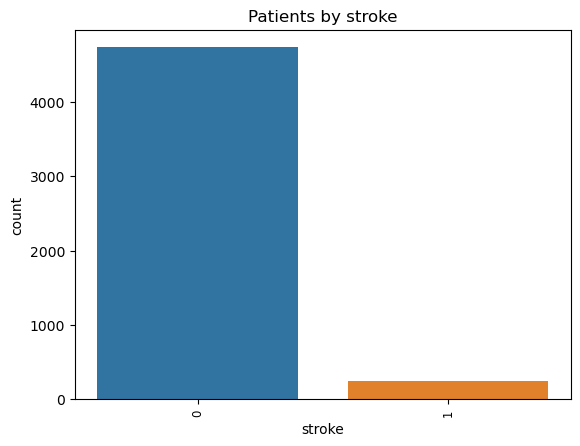

In [39]:
for idx in df.columns:
    df_plot = df.copy()
    df_plot = (df.groupby(idx)[idx].count()
                .to_frame()
                .rename(columns={idx: "count"})
                .reset_index())
    sns.barplot(x=df_plot[idx], y=df_plot["count"])
    plt.title(f"Patients by {idx}")
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.locator_params(axis='x', nbins=25)
    plt.show()

## Feature Importance: Stroke rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable
- Stroke rate
- Risk ratio
- Mutual information

In [40]:
stroke_female = df_train_full[df_train_full.gender == 'female'].stroke.mean()
stroke_male = df_train_full[df_train_full.gender == 'male'].stroke.mean()

print(stroke_female, stroke_male)

0.043722943722943726 0.05077658303464755


In [41]:
df_train_full.ever_married.value_counts()

yes    2636
no     1348
Name: ever_married, dtype: int64

In [42]:
stroke_partner = df_train_full[df_train_full.ever_married == 'yes'].stroke.mean()
stroke_no_partner = df_train_full[df_train_full.ever_married == 'no'].stroke.mean()

print(stroke_partner, stroke_no_partner)

0.0625948406676783 0.015578635014836795


In [43]:
print(global_stroke_rate - stroke_male)
print(global_stroke_rate - stroke_female)
print(global_stroke_rate - stroke_partner)
print(global_stroke_rate - stroke_no_partner)
print(stroke_partner / global_stroke_rate)
print(stroke_no_partner / global_stroke_rate)

-0.004089836046695744
0.002963803265008079
-0.015908093679726495
0.03110811197311501
1.3407411033334966
0.33368431128553655


```
SELECT
    gender,
    AVG(stroke),
    AVG(stroke) - global_stroke_rate as diff,
    AVG(stroke) / global_stroke_rate as risk
FROM
    data
GROUP BY
    gender;
```

In [44]:
df_train_full.groupby('gender').stroke.mean()

gender
female    0.043723
male      0.050777
Name: stroke, dtype: float64

In [45]:
df_train_full.groupby('gender').stroke.agg(['mean', 'count'])

,mean,count
gender,,
female,0.043723,2310
male,0.050777,1674


In [46]:
df_group = df_train_full.groupby('gender').stroke.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_stroke_rate
df_group['ratio'] = df_group['mean'] / global_stroke_rate
df_group

,mean,count,diff,ratio
gender,,,,
female,0.043723,2310,-0.002964,0.936517
male,0.050777,1674,0.004090,1.087602


In [47]:
from IPython.display import display

In [48]:
for col in columns_categorical + columns_binary:
    df_group = df_train_full.groupby(col).stroke.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_stroke_rate
    df_group['ratio'] = df_group['mean'] / global_stroke_rate
    display(df_group)

,mean,count,diff,ratio
gender,,,,
female,0.043723,2310,-0.002964,0.936517
male,0.050777,1674,0.004090,1.087602


,mean,count,diff,ratio
ever_married,,,,
no,0.015579,1348,-0.031108,0.333684
yes,0.062595,2636,0.015908,1.340741


,mean,count,diff,ratio
work_type,,,,
children,0.003704,540,-0.042983,0.079331
govt_job,0.048638,514,0.001951,1.041797
private,0.050611,2292,0.003924,1.084051
self-employed,0.067398,638,0.020711,1.443624


,mean,count,diff,ratio
residence_type,,,,
rural,0.041117,1970,-0.005570,0.880694
urban,0.052135,2014,0.005448,1.116699


,mean,count,diff,ratio
smoking_status,,,,
formerly_smoked,0.075177,705,0.028491,1.610249
never_smoked,0.042120,1472,-0.004567,0.902174
smokes,0.057471,609,0.010785,1.230997
unknown,0.030050,1198,-0.016637,0.643653


,mean,count,diff,ratio
hypertension,,,,
0,0.038921,3597,-0.007765,0.83367
1,0.118863,387,0.072176,2.54597


,mean,count,diff,ratio
heart_disease,,,,
0,0.039628,3760,-0.007059,0.848799
1,0.165179,224,0.118492,3.538018


## Feature importance: Mutual information

Mutual information - concept from information theory, 
it tells us how much we can learn about one variable if we know the value of another
- https://en.wikipedia.org/wiki/Mutual_information

In [49]:
print(mutual_info_score(df_train_full.gender, df_train_full.stroke))
print(mutual_info_score(df_train_full.ever_married, df_train_full.stroke))
print(mutual_info_score(df_train_full.hypertension, df_train_full.stroke))
print(mutual_info_score(df_train_full.smoking_status, df_train_full.stroke))
print(mutual_info_score(df_train_full.residence_type, df_train_full.stroke))
print(mutual_info_score(df_train_full.work_type, df_train_full.stroke))

0.00013526299761548732
0.006616881865849265
0.004698191256814449
0.002712788069945904
0.00034196668651678697
0.005468044754317574


In [50]:
def mutual_info_stroke_score(series):
    return mutual_info_score(series, df_train_full.stroke)

In [51]:
mi = df_train_full[columns_categorical + columns_binary].apply(mutual_info_stroke_score)
mi.sort_values(ascending=False).to_frame(name='MI')

,MI
ever_married,0.006617
heart_disease,0.006061
work_type,0.005468
hypertension,0.004698
smoking_status,0.002713
residence_type,0.000342
gender,0.000135


## Feature importance: Correlation
How about numerical columns?
- Correlation coefficient

In [52]:
df_train_full[columns_numerical].corrwith(df_train_full.stroke)

age                  0.229824
avg_glucose_level    0.125625
bmi                  0.059971
dtype: float64

In [53]:
df_train_full.age.describe()

count    3984.000000
mean       43.528574
std        22.682902
min         0.080000
25%        26.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [54]:
print(df_train_full[df_train_full.age <= 26.0].stroke.mean())
print(df_train_full[(df_train_full.age > 26.0) & (df_train_full.age <= 61.0)].stroke.mean())
print(df_train_full[df_train_full.age > 61.0].stroke.mean())

0.0019120458891013384
0.03168114460909555
0.12436289500509684


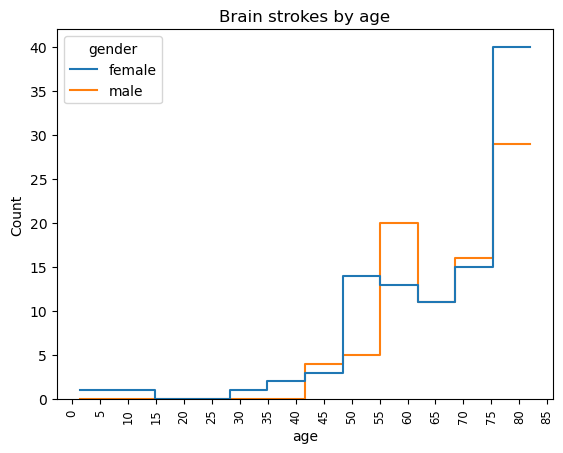

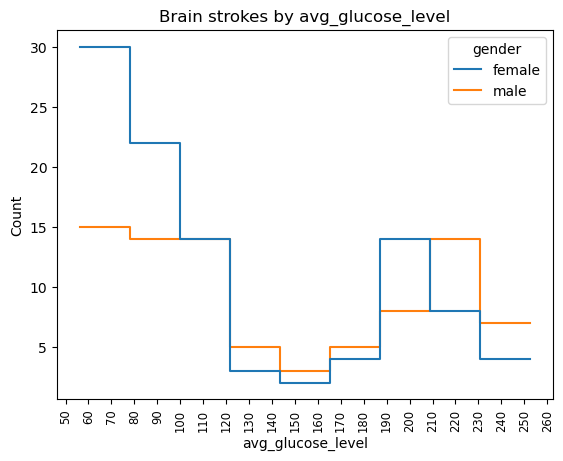

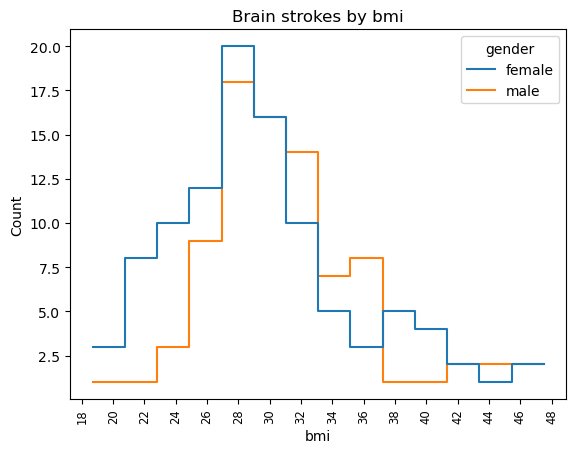

In [55]:
for numerical in columns_numerical:
    df_plot = df_train_full[df_train_full.stroke == 1]
    sns.histplot(df_plot, x = numerical, hue = 'gender', element = 'step', fill=False)
    plt.title(f"Brain strokes by {numerical}")
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.locator_params(axis='x', nbins=25)
    plt.show()



## One-hot encoding
- Use Scikit-Learn to encode categorical features

In [56]:
df_train[['gender', 'ever_married']].iloc[:10]

,gender,ever_married
0,female,yes
1,female,yes
2,female,no
3,male,yes
4,female,yes
5,male,yes
6,female,no
7,male,no
8,male,yes
9,male,yes


In [57]:
df_train[['gender', 'ever_married']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'female',
  2: 'female',
  3: 'male',
  4: 'female',
  5: 'male',
  6: 'female',
  7: 'male',
  8: 'male',
  9: 'male'},
 'ever_married': {0: 'yes',
  1: 'yes',
  2: 'no',
  3: 'yes',
  4: 'yes',
  5: 'yes',
  6: 'no',
  7: 'no',
  8: 'yes',
  9: 'yes'}}

In [58]:
dicts = df_train[['gender', 'ever_married']].iloc[:10].to_dict(orient='records')
dicts

[{'gender': 'female', 'ever_married': 'yes'},
 {'gender': 'female', 'ever_married': 'yes'},
 {'gender': 'female', 'ever_married': 'no'},
 {'gender': 'male', 'ever_married': 'yes'},
 {'gender': 'female', 'ever_married': 'yes'},
 {'gender': 'male', 'ever_married': 'yes'},
 {'gender': 'female', 'ever_married': 'no'},
 {'gender': 'male', 'ever_married': 'no'},
 {'gender': 'male', 'ever_married': 'yes'},
 {'gender': 'male', 'ever_married': 'yes'}]

In [59]:
dv = DictVectorizer()
dv.fit(dicts)

DictVectorizer()

In [60]:
dv.transform(dicts)

<10x4 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [61]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [62]:
dv.transform(dicts)

array([[0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.]])

In [63]:
dv.get_feature_names_out()

array(['ever_married=no', 'ever_married=yes', 'gender=female',
       'gender=male'], dtype=object)

In [64]:
train_dict = df_train[columns_categorical + columns_binary + columns_numerical].to_dict(orient='records')

In [65]:
train_dict[0]

{'gender': 'female',
 'ever_married': 'yes',
 'work_type': 'self-employed',
 'residence_type': 'urban',
 'smoking_status': 'unknown',
 'hypertension': 0,
 'heart_disease': 0,
 'age': 59.0,
 'avg_glucose_level': 81.64,
 'bmi': 32.8}

In [66]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [67]:
dv.get_feature_names_out()

array(['age', 'avg_glucose_level', 'bmi', 'ever_married=no',
       'ever_married=yes', 'gender=female', 'gender=male',
       'heart_disease', 'hypertension', 'residence_type=rural',
       'residence_type=urban', 'smoking_status=formerly_smoked',
       'smoking_status=never_smoked', 'smoking_status=smokes',
       'smoking_status=unknown', 'work_type=children',
       'work_type=govt_job', 'work_type=private',
       'work_type=self-employed'], dtype=object)

In [68]:
dv.transform(train_dict[:5])[0]

array([59.  , 81.64, 32.8 ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
        1.  ])

In [69]:
list(dv.transform(train_dict[:5])[0])

[59.0,
 81.64,
 32.8,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [70]:
X_train = dv.fit_transform(train_dict)
val_dicts = df_val[columns_categorical + columns_binary + columns_numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
print(X_train.shape)
print(X_val.shape)

(2988, 19)
(996, 19)


## Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [71]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [72]:
model.coef_

array([[ 6.30960676e-02,  4.51948661e-03, -7.27233030e-04,
        -1.04237798e+00, -1.21957582e+00, -1.12213819e+00,
        -1.13981561e+00,  3.84358810e-01,  3.81572389e-01,
        -1.18773715e+00, -1.07421666e+00, -6.77653149e-01,
        -7.71282624e-01, -2.06721128e-01, -6.06296903e-01,
         2.63324098e-02, -7.26882645e-01, -6.14133666e-01,
        -9.47269903e-01]])

In [73]:
model.coef_[0].round(3) # weights

array([ 6.300e-02,  5.000e-03, -1.000e-03, -1.042e+00, -1.220e+00,
       -1.122e+00, -1.140e+00,  3.840e-01,  3.820e-01, -1.188e+00,
       -1.074e+00, -6.780e-01, -7.710e-01, -2.070e-01, -6.060e-01,
        2.600e-02, -7.270e-01, -6.140e-01, -9.470e-01])

In [74]:
model.intercept_

array([-2.2619538])

In [75]:
model.intercept_[0].round(3)

-2.262

In [76]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
model.predict_proba(X_train)

array([[0.95944382, 0.04055618],
       [0.96504271, 0.03495729],
       [0.9757279 , 0.0242721 ],
       ...,
       [0.93376632, 0.06623368],
       [0.99454718, 0.00545282],
       [0.99139993, 0.00860007]])

In [78]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.04117978, 0.01338613, 0.00481434, 0.01575954, 0.04822021,
       0.00413937, 0.00344885, 0.00485114, 0.25805864, 0.01320338,
       0.01169732, 0.01634636, 0.01473993, 0.05507542, 0.00997912,
       0.06160339, 0.03616459, 0.00410238, 0.0294522 , 0.35862567,
       0.01097272, 0.01838024, 0.01854671, 0.03253168, 0.00697778,
       0.06196957, 0.14824719, 0.03614087, 0.00278654, 0.00793137,
       0.06833605, 0.19071717, 0.05279322, 0.04465753, 0.01530583,
       0.01498256, 0.00992563, 0.0187994 , 0.12956384, 0.1422271 ,
       0.01125994, 0.00468622, 0.08727447, 0.02913751, 0.00825059,
       0.01144231, 0.02473604, 0.00708502, 0.00352389, 0.00385538,
       0.03963379, 0.00561896, 0.06041707, 0.01994869, 0.01261623,
       0.14761107, 0.00810827, 0.0098464 , 0.00824517, 0.05293159,
       0.00410033, 0.12434896, 0.07044623, 0.12115538, 0.11557907,
       0.00801929, 0.0446489 , 0.29356148, 0.00342114, 0.09126075,
       0.09938888, 0.00645878, 0.00810469, 0.04854673, 0.00704

In [79]:
may_stroke = (y_pred >=0.5)

In [80]:
y_val == may_stroke

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [81]:
(y_val == may_stroke).mean()

0.9718875502008032

In [82]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = may_stroke.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [83]:
df_pred

,probability,prediction,actual,correct
0,0.041180,0,0,True
1,0.013386,0,0,True
2,0.004814,0,0,True
3,0.015760,0,0,True
4,0.048220,0,0,True
...,...,...,...,...
991,0.126120,0,0,True
992,0.042181,0,0,True
993,0.014636,0,0,True
994,0.005673,0,0,True


In [84]:
df_pred.correct.mean()

0.9718875502008032

In [85]:
df_pred.correct.astype('int').mean()

0.9718875502008032

## Model intepretation
- Look at the coefficients
- Train a smaller model with fewer features

In [86]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'age': 0.063,
 'avg_glucose_level': 0.005,
 'bmi': -0.001,
 'ever_married=no': -1.042,
 'ever_married=yes': -1.22,
 'gender=female': -1.122,
 'gender=male': -1.14,
 'heart_disease': 0.384,
 'hypertension': 0.382,
 'residence_type=rural': -1.188,
 'residence_type=urban': -1.074,
 'smoking_status=formerly_smoked': -0.678,
 'smoking_status=never_smoked': -0.771,
 'smoking_status=smokes': -0.207,
 'smoking_status=unknown': -0.606,
 'work_type=children': 0.026,
 'work_type=govt_job': -0.727,
 'work_type=private': -0.614,
 'work_type=self-employed': -0.947}

In [87]:
small = ['ever_married', 'heart_disease', 'work_type', 'hypertension', 'age', 'avg_glucose_level']

df_train[small].iloc[:10].to_dict(orient='records')

[{'ever_married': 'yes',
  'heart_disease': 0,
  'work_type': 'self-employed',
  'hypertension': 0,
  'age': 59.0,
  'avg_glucose_level': 81.64},
 {'ever_married': 'yes',
  'heart_disease': 0,
  'work_type': 'private',
  'hypertension': 0,
  'age': 47.0,
  'avg_glucose_level': 204.63},
 {'ever_married': 'no',
  'heart_disease': 0,
  'work_type': 'govt_job',
  'hypertension': 0,
  'age': 34.0,
  'avg_glucose_level': 226.28},
 {'ever_married': 'yes',
  'heart_disease': 0,
  'work_type': 'self-employed',
  'hypertension': 1,
  'age': 80.0,
  'avg_glucose_level': 213.33},
 {'ever_married': 'yes',
  'heart_disease': 0,
  'work_type': 'private',
  'hypertension': 1,
  'age': 36.0,
  'avg_glucose_level': 91.56},
 {'ever_married': 'yes',
  'heart_disease': 0,
  'work_type': 'private',
  'hypertension': 0,
  'age': 32.0,
  'avg_glucose_level': 71.5},
 {'ever_married': 'no',
  'heart_disease': 0,
  'work_type': 'children',
  'hypertension': 0,
  'age': 7.0,
  'avg_glucose_level': 113.95},
 {'eve

In [88]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [89]:
dv_small = DictVectorizer(sparse=False)

dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [90]:
dv_small.get_feature_names_out()

array(['age', 'avg_glucose_level', 'ever_married=no', 'ever_married=yes',
       'heart_disease', 'hypertension', 'work_type=children',
       'work_type=govt_job', 'work_type=private',
       'work_type=self-employed'], dtype=object)

In [91]:
X_train_small = dv_small.transform(dicts_train_small)

In [92]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [93]:
w0 = model_small.intercept_[0]
w0

-5.546292849948664

In [94]:
w = model_small.coef_[0]
w.round(3)

array([ 0.068,  0.005, -0.939, -1.107,  0.356,  0.369,  0.553, -0.833,
       -0.681, -1.085])

In [95]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'age': 0.068,
 'avg_glucose_level': 0.005,
 'ever_married=no': -0.939,
 'ever_married=yes': -1.107,
 'heart_disease': 0.356,
 'hypertension': 0.369,
 'work_type=children': 0.553,
 'work_type=govt_job': -0.833,
 'work_type=private': -0.681,
 'work_type=self-employed': -1.085}

In [96]:
(y_val == may_stroke).mean()

0.9718875502008032

## Using the logistic regression model

In [97]:
dicts_full_train = df_train_full[columns_categorical + columns_binary +  columns_numerical].to_dict(orient='records')

print(dicts_full_train[:1])

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

y_full_train = df_train_full.stroke.values

model = LogisticRegression().fit(X_full_train, y_full_train)

dicts_test = df_test[columns_categorical + columns_binary +  columns_numerical].to_dict(orient='records')

X_test = dv.transform(dicts_test)

y_pred = model.predict_proba(X_test)[:, 1]

may_stroke = (y_pred >= 0.5)

print(f"Accuracy: {(may_stroke == y_test).mean()}")



[{'gender': 'male', 'ever_married': 'no', 'work_type': 'private', 'residence_type': 'urban', 'smoking_status': 'unknown', 'hypertension': 0, 'heart_disease': 0, 'age': 30.0, 'avg_glucose_level': 113.08, 'bmi': 41.8}]
Accuracy: 0.9388164493480441


In [98]:
customer = dicts_test[10]
print(f"A customer: {customer}")

X_small = dv.transform([customer])

print(f"transformed shape: {X_small.shape}")

print(f"predict stroke: {model.predict_proba(X_small)[0, 1]}")
print(f"actually stroked: {y_test[10]}")

A customer: {'gender': 'male', 'ever_married': 'no', 'work_type': 'private', 'residence_type': 'urban', 'smoking_status': 'never_smoked', 'hypertension': 0, 'heart_disease': 0, 'age': 23.0, 'avg_glucose_level': 87.87, 'bmi': 23.4}
transformed shape: (1, 19)
predict stroke: 0.0051257382579050605
actually stroked: 0


In [99]:
X_small = dv.transform([customer])


### Evaluation metrics for classifcation

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
0.00 0.062
0.05 0.753
0.10 0.866
0.15 0.913
0.20 0.929
0.25 0.941
0.30 0.941
0.35 0.938
0.40 0.939
0.45 0.939
0.50 0.939
0.55 0.938
0.60 0.938
0.65 0.938
0.70 0.938
0.75 0.938
0.80 0.938
0.85 0.938
0.90 0.938
0.95 0.938
1.00 0.938


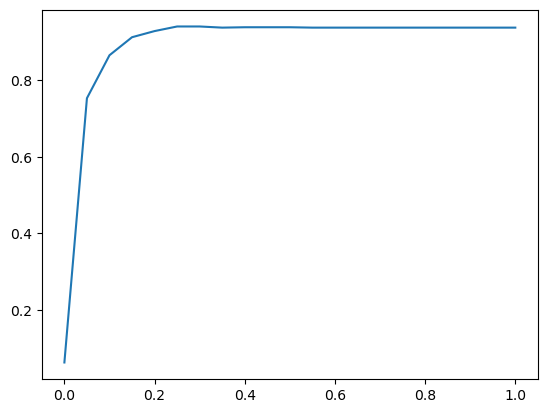

In [100]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)
print(thresholds)

scores = []

for t in thresholds:
    may_stroke = (y_pred >= t)
#     score = (y_val == churn_decision).mean()
    score = accuracy_score(y_test, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

plt.plot(thresholds, scores)

In [101]:
from collections import Counter

Counter(y_pred >= 1.0)

Counter({False: 997})

In [102]:
Counter(y_test)

Counter({0: 935, 1: 62})

In [103]:
y_test.mean()

0.062186559679037114

In [104]:
1 - y_test.mean()

0.9378134403209629

In [105]:
def vectorize(df_train, dv = None):
    dicts = df_train[columns_categorical + columns_binary + columns_numerical].to_dict(orient='records')
    if dv == None:
        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(dicts)
    else:
        X_train = dv.transform(dicts)

    return X_train, dv

In [106]:
def train(df_train, y_train, C=1.0):
    X_train, dv = vectorize(df_train)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [107]:
def predict(df, dv, model):
    dicts = df[columns_categorical + columns_binary + columns_numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [108]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.stroke.values
        y_val = df_val.stroke.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.001 0.832 +- 0.033
C=0.01 0.834 +- 0.034
C=0.1 0.835 +- 0.036
C=0.5 0.835 +- 0.038
C=1 0.834 +- 0.038
C=5 0.834 +- 0.038
C=10 0.834 +- 0.038



In [109]:
dv, model = train(df_train, y_train, C=0.5)
y_pred = predict(df_val, dv, model)
mean_squared_error(y_val, y_pred, squared=False)

0.18067997031972086

## Ridge Regression

In [110]:
rmses = []

for alpha in [0.001, 0.01, 0.5, 1, 3, 5, 10]:
    model_ridge = Ridge(alpha=alpha, random_state=42, max_iter=200)
    X_train, dv = vectorize(df_train)
    model_ridge.fit(X_train, y_train)
    X_val, _ = vectorize(df_val, dv)
    y_pred = model_ridge.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmses.append(rmse)
    print(f'alpha:{alpha:>6}, rmse:{rmse:.5f}')

alpha: 0.001, rmse:0.17964
alpha:  0.01, rmse:0.17964
alpha:   0.5, rmse:0.17964
alpha:     1, rmse:0.17964
alpha:     3, rmse:0.17962
alpha:     5, rmse:0.17961
alpha:    10, rmse:0.17959


In [111]:
model_ridge = Ridge(alpha=10)
X_train, dv = vectorize(df_train)
model_ridge.fit(X_train, y_train)
X_val, _ = vectorize(df_val, dv)
y_pred = model_ridge.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

0.17958677638326245

## Random Forest

In [112]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.stroke == 1).astype('int').values
y_val = (df_val.stroke == 1).astype('int').values
y_test = (df_test.stroke == 1).astype('int').values

del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [113]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dv.get_feature_names_out(X_train)

array(['age', 'avg_glucose_level', 'bmi', 'ever_married', 'gender',
       'heart_disease', 'hypertension', 'residence_type=rural',
       'residence_type=urban', 'smoking_status=formerly_smoked',
       'smoking_status=never_smoked', 'smoking_status=smokes',
       'smoking_status=unknown', 'work_type=children',
       'work_type=govt_job', 'work_type=private',
       'work_type=self-employed'], dtype=object)

In [114]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [115]:
rmses = []
for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=31)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmses.append(rmse)
    print(f'i: {i:>6}, rmse: {rmse:.5f}')

i:     10, rmse: 0.20535
i:     20, rmse: 0.20086
i:     30, rmse: 0.19723
i:     40, rmse: 0.19830
i:     50, rmse: 0.19776
i:     60, rmse: 0.19795
i:     70, rmse: 0.19845
i:     80, rmse: 0.19802
i:     90, rmse: 0.19781
i:    100, rmse: 0.19821
i:    110, rmse: 0.19754
i:    120, rmse: 0.19737
i:    130, rmse: 0.19690
i:    140, rmse: 0.19677
i:    150, rmse: 0.19692
i:    160, rmse: 0.19666
i:    170, rmse: 0.19636
i:    180, rmse: 0.19610
i:    190, rmse: 0.19585
i:    200, rmse: 0.19553
